# Lab 3-1:  Non-Parametric Tests

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

---
## Sign Test

The sign test can be used if we have a sample dataset and want to know if the mean of this dataset is different from some null hypothesis mean, $\mu$.

We first calculate the anomaly for each number in our dataset, which is the difference between that number and the null hypothesis mean:

$anomaly = (x - \mu)$

If our samples came from a population with a mean of $\mu$, then we'd expect to have appoximately equal numbers of positive and negative anomalies. In other words, if the null hypothesis is true, we’d expect our sample values to fall evenly on either side of the null hypothesis mean.

The null hypothesis is that our sample mean is equal to some population mean, and stated formally is:

$H_0: \bar{x} = \mu$

The test statistic we use in the sign test is the number of samples that are larger than $\mu$, which is the number of positive anomalies.

$y = $ count of anomalies $ > 0$

We can have one-sided or two-sided alternate hypotheses:

| Alternate Hypothesis | Rejection Region |
| --- | --- |
|$H_{a}: \bar{x} > \mu$ | $y \geq c$ |
|$H_{a}: \bar{x} < \mu$ |  $y \leq c$ |
|$H_{a}: \bar{x} \neq \mu$ |  $y \geq c$ or  $y \leq n - c$ |

The "critical number", $c$ that defines our rejection region come from the binomial distribution (with 50% probability), and $\alpha$ (or $\frac{\alpha}{2}$ for a two-sided test) for our chosen confidence level.

We use a binomial distribution with probability of 50% because for our null hypothesis to be true, about 50% of our anomalies should be positive, and about 50% should be negative.

The critical number, $c$, that defines our rejection region can be looked up in a binomial distribution table (corresponding to the sample size, $n$, for the test), or in python we can use a function like `scipy.binom.ppf()` ([read the documentation for this function here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)) (and remember to set p=0.5 for 50% probability).

## Sign Test Example

Suppose we took measurements of [turbidity](https://en.wikipedia.org/wiki/Turbidity) during and just after a storm event in some natural stream, and we want to determine if the mean turbitity exceeded 100 NTU.

Our measurements are:

In [2]:
# Sample dataset
x = np.array( [50, 70, 170, 50, 170, 30, 170, 140, 130, 200, 90, 70, 10, 80, 230, 190, 110, 140, 20, 110, ] )

Our null hypothesis is:

$H_0: \bar{x} = \mu = 100$ NTU

In [3]:
# Null hypothesis mean
mu = 100

And our alternate hypothesis is:

$H_{a}: \bar{x} > \mu$ or $\bar{x} > 100$ NTU 

With rejection region $y \geq c$

To compute our test statistic, we need to first compute the anomalies: $(x - \mu)$

In [4]:
# Calculate anomalies
anomalies = x - mu

# look at the anomalies
anomalies

array([-50, -30,  70, -50,  70, -70,  70,  40,  30, 100, -10, -30, -90,
       -20, 130,  90,  10,  40, -80,  10])

Now, count the number of positive anomalies. One way to do this in python is to use a [boolean](https://www.w3schools.com/python/python_booleans.asp) array of True/False values, and take the sum. Python treats True values as a 1, and False values as a 0:

In [5]:
positive_anomalies = anomalies > 0

# Look at our boolean array, each "true" corresponds to a positive anomaly
positive_anomalies

array([False, False,  True, False,  True, False,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True])

If we use the `numpy.sum()` function, it will treat each True as a 1, and each False as a 0, therefore we get the county of positive anomalies only.

In [6]:
# Count the number of positive anomalies, this is our test statistic
y = np.sum( anomalies > 0 )

# look at our test statistic
y

11

Finally, we need to find our critical value, $c$, to see if we can accept or reject the null hypothesis.

$c$ comes from a binomial distribution, with $n$ being our number of samples, and a probability of 50%.

This is also where we get to choose the level of confidence, our alpha, for our test.

In [7]:
# Choose my alpha for 95% confidence, one-sided test
alpha = 0.05
# Number of samples is the length of x
n =len(x)

# Compute the critical value from the binomial distribution (with p=50%)
c = stats.binom.ppf(alpha, n, 0.5)

# Can I reject the null hypothesis?
print('Test statistic, y = {}'.format(y))
print('Critical value, c = {}'.format(c))

Test statistic, y = 11
Critical value, c = 6.0


Our test statistic exceeds our critical value, therefore we are in the rejection region for this one-sided sign test ($y \geq c$) and can reject the null hypothesis.

The mean turbidity of the stream at this time was greater than 100 NTU, with 95% confidence.

However, note that the sign test does not take into account the **magnitude** of the anomalies...

---
## Rank-Sum Test

The [Rank-Sum Test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) (also called the Mann-Whitney U test, or Wilcoxon Rank-sum Test) is a non-parametric test that lets us determine if one group of measurements is larger than a second group. Unlike the parametric tests we've used previously, we do not need to assume normality (or any particular distribution), nor that the two groups have similar distributions, nor that the two groups have equal variances.

The null hypothesis is that the probability of any given sample from one group, $x_i$, being greater than samples from the other group, $y_j$, is only 50%. In other words, the null hypothesis is that the probability of samples from one group being higher or lower than samples from the other group are equal (both 50%).

$H_0: P(x_i > y_j) = 0.5$

We can have alternative hypotheses for one- and two-sided tests:

$H_a: P(x_i > y_j) \leq 0.5$ (we are testing if x is smaller than y)

$H_a: P(x_i > y_j) \geq 0.5$ (we are testing if x is larger than y)

$H_a: P(x_i > y_j) \neq 0.5$ (we are testing if x is different than y)


### Performing the rank-sum test

The first step is to rank all of our data. If we have one group of length $n$ with samples $x_i$, and another group with length $m$ with sample $y_j$, we sort the data from low to high, and assign the "joint ranks" $R_k$ for each data point where:

$R_k = 1 , 2, 3, ..., N$ where $N = n + m$

The idea is that if we expect our null hypothesis to be true, then we should have equal numbers of "low rank" $x_i$ and $y_j$ values, and equal numbers of "high rank" $x_i$ and $y_j$ values.  If we have a tie anywhere, use the average rank (e.g. if we would have a tie in ranks 3 and 4, assign both a rank of 3.5, and our ranks would then be R = 1, 2, 3.5, 3.5, 5, ...).

We then use these ranks to compute a test statistic. Different versions of the rank-sum test use different test statistics described below.

**The $W_{rs}$ test statistic:**

The basic rank-sum test statistic is the sum of ranks for one of the groups (if groups have different sample sizes, use the group with the smaller sample size):

$W_{rs} = \sum R_{i}$ or $\sum R_{j}$ 

We can reject the null hypothesis when our test statistic falls in the rejection region defined by critical values we can  look up in a [table](http://plantsys.elte.hu/oktatas/Biometria/tablazatok/Wilcoxon_table_ketmintas_probahoz.pdf), given our sample sizes $n$ and $m$, and chosen significance level with $alpha$.

**The $Z_{rs}$ test statistic:**

The test statistic, $W_{rs}$ is nearly normally distributed even with fairly small sample sizes of 10 for each group (e.g. when $n \ge 10$ and $m \ge 10$). To compute a p-value for our rank-sum test, the "large-sample approximation" method uses a "continuity correction" to shift $W_{rs}$ values by $d/2$ where $d$ is the smallest possible difference between $W_{rs}$ values (for the rank-sum test, $d=1$). This creates a normal distribution approximation of what was our discontinuous $W_{rs}$ distribution. This can then be expressed as the test statistic $Z_{rs}$:

$Z_{rs} = \displaystyle\frac{W_{rs}\pm\frac{d}{2}-\mu_W}{\sigma_W}$

where we are assuming that for large sample sizes $W_{rs}$ is approximately normally distributed with a mean of $\mu_W = \frac{1}{2}\cdot n\cdot (n+m+1)$, a standard deviation of $\sigma_W = \sqrt{n\cdot m\cdot(n+m+1)\cdot\frac{1}{12}}$, and the step size between ranks is $d = 1$, therefore:

$Z_{rs} = \displaystyle\frac{W_{rs}\pm\frac{1}{2}-\frac{1}{2}\cdot n\cdot (n+m+1)}{\sqrt{n\cdot m\cdot(n+m+1)\cdot\frac{1}{12}}}$

The $\pm$ refers to whether we are making a one sided test with a posited increase or decrease (where if we're looking for an increase, adjust down by subtracting, or if we're looking for a decrease, adjust up by adding). See equation 5.3 and read more about this in Chapter 5 section [5.1.4 The Large-sample Approximation to the Rank-sum Test](https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf).

**The $U$ test statistic:**

Note also that you will also somtimes see the U test statistic used here, as in the "Mann-Whitney U test", where $U = W_{rs} - \displaystyle \frac{n(n+1)}{2}$

Here is a [table](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Nonparametric/Mann-Whitney-Table-CriticalValues.pdf) with U statistic values. 

## Rank-Sum Test Example

In the example below, we measure 10 samples of turbidity in two streams (group $x$ with $n=10$ and group $y$ with $m=10$), and we want to know if they are different from one another (two-tailed test) with 95% confidence, $\alpha=0.05$.

In [8]:
# Sample datasets (there are no ties in this data, so we don't need to worry about it in this example)
x = np.array( [155, 70, 175, 50, 190, 115, 195, 140, 215, 200 ] )
y = np.array( [100, 40, 65, 25, 90, 30, 10, 75, 130, 110 ] )

Make a pandas dataframe to store our values

In [9]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,155,100
1,70,40
2,175,65
3,50,25
4,190,90
5,115,30
6,195,10
7,140,75
8,215,130
9,200,110


Visualize the data

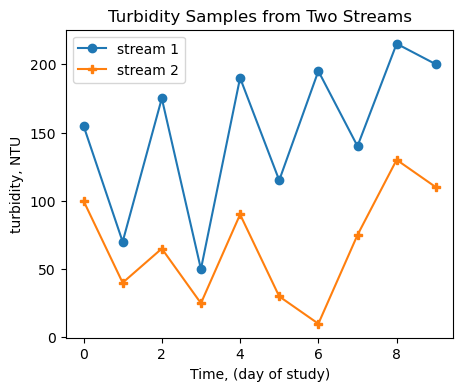

In [10]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

ax1.plot(x, 'o-',c='tab:blue', label='stream 1')
ax1.plot(y, 'P-',c='tab:orange', label='stream 2')
ax1.legend()
ax1.set_xlabel('Time, (day of study)')
ax1.set_ylabel('turbidity, NTU')
ax1.set_title('Turbidity Samples from Two Streams');

Pivot to format the table with group labels and values

In [11]:
data = pd.melt(df, value_vars=['x', 'y'], var_name='group', value_name='value')
data

,group,value
0,x,155
1,x,70
2,x,175
3,x,50
4,x,190
5,x,115
6,x,195
7,x,140
8,x,215
9,x,200


Sort the data by value

In [12]:
data_sorted = data.sort_values('value', ignore_index=True)
data_sorted

,group,value
0,y,10
1,y,25
2,y,30
3,y,40
4,x,50
5,y,65
6,x,70
7,y,75
8,y,90
9,y,100


Add a rank to each row

In [13]:
data_sorted['rank'] = data_sorted.index + 1
data_sorted

,group,value,rank
0,y,10,1
1,y,25,2
2,y,30,3
3,y,40,4
4,x,50,5
5,y,65,6
6,x,70,7
7,y,75,8
8,y,90,9
9,y,100,10


Visualize the problem

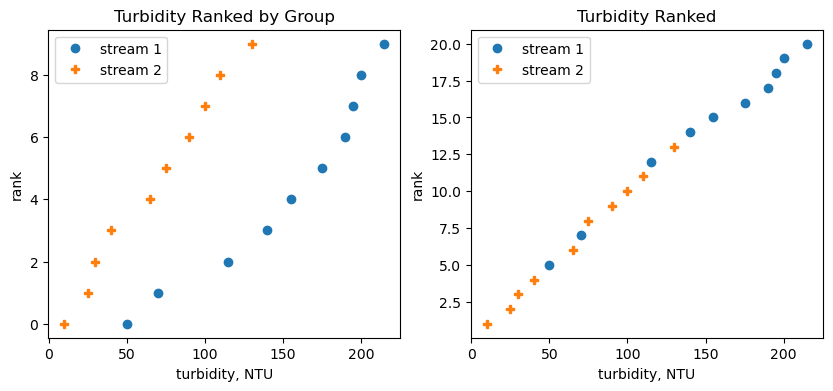

In [14]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax1.plot(np.sort(x), np.arange(len(x)), 'o',c='tab:blue', label='stream 1')
ax1.plot(np.sort(y), np.arange(len(y)), 'P',c='tab:orange', label='stream 2')
ax1.legend()
ax1.set_xlabel('turbidity, NTU')
ax1.set_ylabel('rank')
ax1.set_title('Turbidity Ranked by Group');

ax2.plot(data_sorted.loc[data_sorted.group=='x']['value'],data_sorted.loc[data_sorted.group=='x']['rank'],'o',c='tab:blue', label='stream 1')
ax2.plot(data_sorted.loc[data_sorted.group=='y']['value'],data_sorted.loc[data_sorted.group=='y']['rank'],'P',c='tab:orange', label='stream 2')
ax2.legend()
ax2.set_xlabel('turbidity, NTU')
ax2.set_ylabel('rank')
ax2.set_title('Turbidity Ranked');

**The $W_{rs}$ test statistic:**

Compute our test statistic, $W_{rs} = \sum R_{i}$ for $i=1,...,n$ 

In [15]:
W = data_sorted.loc[data_sorted.group=='x']['rank'].sum()
print('Test statistic, W = {}'.format(W))

Test statistic, W = 143


We look up our critical W values in this [table](http://plantsys.elte.hu/oktatas/Biometria/tablazatok/Wilcoxon_table_ketmintas_probahoz.pdf), and find that for a 2-tailed test, with $\alpha=0.05$ and sample sizes $n=10$ and $m=10$, the upper and lower critical values are:

$W_{c,l}=78$

$W_{c,u}=132$

Our result is that $W_{rs} > W_{c,u}$, our test statistic is greater than the upper critical value. Therefore we can reject the null hypothesis, and say that our alternate hypothesis that group $x$ has higher turbidity than group $y$ is true with 95% confidence.

**The $U$ test statistic:**

Let's also compute the test statistic $U = W_{rs} - \displaystyle \frac{n(n+1)}{2}$

(We can look up the critical U values in this [table](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Nonparametric/Mann-Whitney-Table-CriticalValues.pdf))

In [16]:
# compute the test statistic, U, ourselves
n = len(x)
U = W - (n*(n+1))/2
print('Test statistic, U = {}'.format(U))

Test statistic, U = 88.0


**The $Z_{rs}$ test statistic:**

Compute the "large-sample approximation" test statistic:

$Z_{rs} = \displaystyle\frac{W_{rs}\pm\frac{1}{2}-\frac{1}{2}\cdot n\cdot (n+m+1)}{\sqrt{n\cdot m\cdot(n+m+1)\cdot\frac{1}{12}}}$

In [17]:
# compute the test statistic, Z, ourselves
n = len(x)
m = len(y)

Z = (W - 0.5 - 0.5*n*(n+m+1)) / np.sqrt( n*m*(n+m+1)/12 )
print('Test statistic, Z = {}'.format(np.round(Z,4)))
print("P-value, p = {}".format(np.round(1-stats.norm.cdf(Z),4)))

Test statistic, Z = 2.8347
P-value, p = 0.0023


Here we can also see that $p < \alpha$, another way to see that we can therefore reject the null hypothesis as a result of this test.

### Alternate example:

What does it look like if we pick the other group? (since our groups are the same size, we could pick either one to look at)

**Compute the rank-sum test statistics W, U, and Z using the ranks of the other group, $y$**

So in this case our alternate hypothesis is $H_a: P(y_j > x_i) \neq 0.5$

Do we come to the same conclusion (reject the null hypothesis) as above? 

**The $W_{rs}$ test statistic:**

In [18]:
# Compute the test statistic, W, but this time for group "y"
W2 = data_sorted.loc[data_sorted.group=='y']['rank'].sum()
print('Test statistic, W = {}'.format(W2))

Test statistic, W = 67


**The $U$ test statistic:**

In [19]:
# compute the test statistic, U, ourselves
U2 = W2 - (m*(m+1))/2
print('Test statistic, U = {}'.format(U2))

Test statistic, U = 12.0


**The $Z_{rs}$ test statistic:**

In [20]:
# compute the test statistic, Z, ourselves
Z2 = (W + 0.5 - 0.5*n*(n+m+1)) / np.sqrt( n*m*(n+m+1)/12 )
print('Test statistic, Z = {}'.format(np.round(Z2,4)))
print("P-value, p = {}".format(np.round(1-stats.norm.cdf(Z2),4)))

Test statistic, Z = 2.9103
P-value, p = 0.0018


---

## Investigating python functions

What functions are available to us in python to perform a rank-sum test?

The scipy library has two we can investigate:
* [scipy.stats.ranksums](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html)
* [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

Read the documentation for both of these functions, and try them out with our sample datasets ($x$ and $y$) in the rank-sum test example above. 

Also take a look at the source code for each function to identify the equations they are using.

Then try to answer the following questions:

1. What assumptions are these functions making? 
2. Are there any additional inputs/options we need to specify to make sure that they duplicate our results above?
3. Which of these functions (or both, or neither) are appropriate for the example here?

In [21]:
# using x as the test group

# use the scipy.stats.mannwhitneyu function to compute U, and p
U_mannwhitney, p_mannwhitney = stats.mannwhitneyu(x,y,use_continuity=True, alternative='greater')
print('Test statistic (from scipy.stats.mannwhitneyu), U = {}'.format(U_mannwhitney))
print('p-value (from scipy.stats.mannwhitneyu), p = {}'.format(np.round(p_mannwhitney,4)))

# this also provides us with a p-value, which we can use to look up the Z statistic
z_mannwhitney = stats.norm.ppf(1-p_mannwhitney)
print("Z from looking up (1-P): {}".format(np.round(z_mannwhitney,4)))

Test statistic (from scipy.stats.mannwhitneyu), U = 88.0
p-value (from scipy.stats.mannwhitneyu), p = 0.0023
Z from looking up (1-P): 2.8347


In [22]:
# using y as the test group

# use the scipy.stats.mannwhitneyu function to compute U, and p
U_mannwhitney, p_mannwhitney = stats.mannwhitneyu(y,x,use_continuity=True, alternative='less')
print('Test statistic (from scipy.stats.mannwhitneyu), U = {}'.format(U_mannwhitney))
print('p-value (from scipy.stats.mannwhitneyu), p = {}'.format(np.round(p_mannwhitney,4)))

# this also provides us with a p-value, which we can use to look up the Z statistic
z_mannwhitney = stats.norm.ppf(1-p_mannwhitney)
print("Z from looking up (1-P): {}".format(np.round(z_mannwhitney,4)))

Test statistic (from scipy.stats.mannwhitneyu), U = 12.0
p-value (from scipy.stats.mannwhitneyu), p = 0.0023
Z from looking up (1-P): 2.8347
